<a href="https://colab.research.google.com/github/DanAlin19/AAD/blob/main/AAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/kaggle/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kaggle

kaggle.api.dataset_download_files('atharvasoundankar/global-music-streaming-trends-and-listener-insights', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/global-music-streaming-trends-and-listener-insights


In [4]:
import pandas as pd
df = pd.read_csv('./data/Global_Music_Streaming_Listener_Preferences.csv', sep=',')
df.head()

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


In [7]:
df.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,36.664000,309.237200,253.51720,50.296464,42.391060
std,13.763844,172.029822,146.36928,23.171936,21.444121
min,13.000000,10.000000,1.00000,10.020000,5.000000
25%,25.000000,161.000000,126.00000,30.147500,24.195000
50%,37.000000,316.000000,254.00000,50.420000,41.960000
75%,49.000000,457.250000,382.00000,70.337500,60.740000
max,60.000000,600.000000,500.00000,89.990000,79.990000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

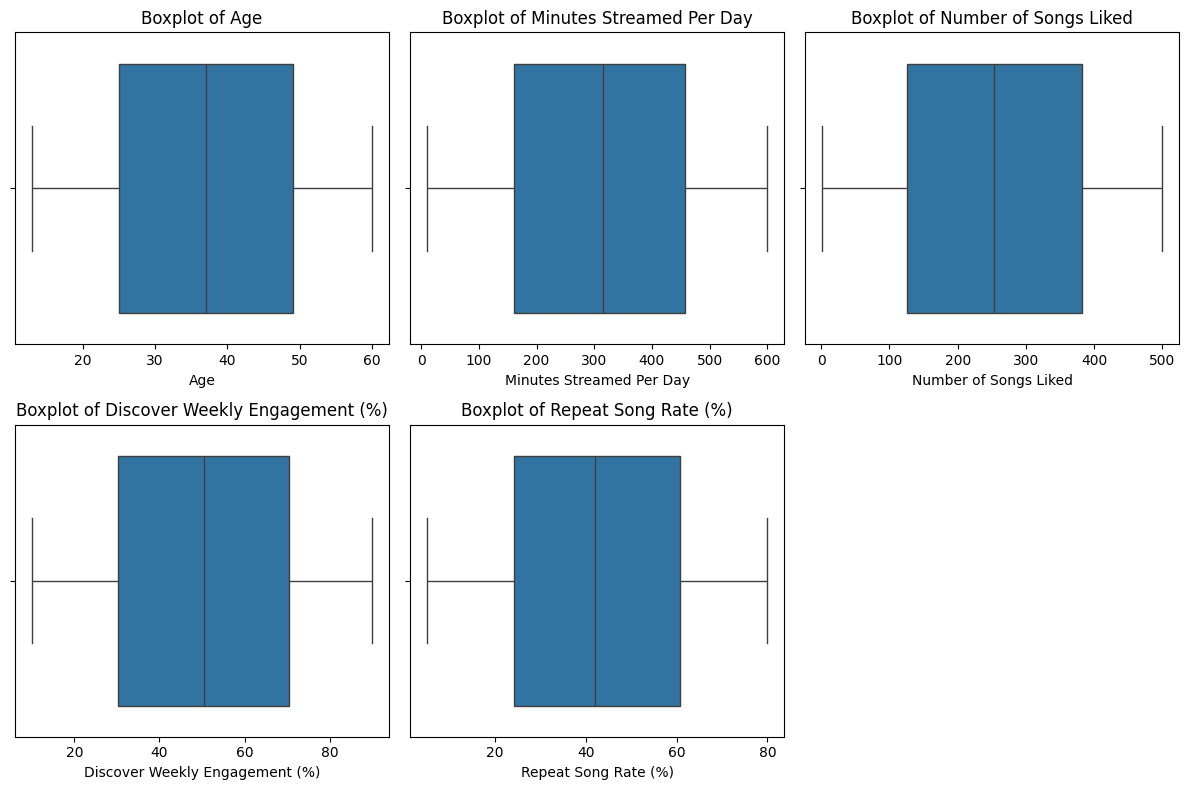

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()